# 0. Коннект к БД

In [17]:
import pandas as pd

df = pd.read_spss('Astrology.sav')
df.head()

,ID,SEX,AGE,FO,TIP,astr1_1,astr1_2,astr1_3,astr1_4,astr1_5,...,astr4,TV,d1,EDU,DOHOD_0,PROF1,PROF2,PROF3,Q515_98T,weight1
0,07246fad688ce8ea,Женский,76.0,Сибирский федеральный округ,Город с численностью от 100 тысяч до 500 тысяч,Не верю ни в какие сверхъестественные силы и я...,NaN,NaN,NaN,NaN,...,"Да, иногда просматриваю, интересно, что предск...",Ежедневно менее четырех часов в день,Не пользуюсь,"Среднее профессиональное (техникум, колледж, ПТУ)",Среднее,Неработающий пенсионер (в том числе по инвалид...,NaN,NaN,,0.660416
1,072470db1e8ceddf,Мужской,34.0,Сибирский федеральный округ,Город с численностью жителей миллион и более ч...,Не верю ни в какие сверхъестественные силы и я...,NaN,NaN,NaN,NaN,...,"Нет, мне это неинтересно",Не смотрю,Провожу в интернете более четырех часов ежедневно,Незаконченное высшее (с 3-го курса вуза) или з...,Среднее,"Работаю по договору, контракту в найме (за иск...","Я работаю в КОММЕРЧЕСКОЙ организации, ее цель ...","Финансовая и страховая деятельность, банковски...",,1.400927
2,0724718c060ce072,Мужской,70.0,Сибирский федеральный округ,Город с численностью от 100 тысяч до 500 тысяч,В Бога,NaN,NaN,NaN,NaN,...,"Нет, мне это неинтересно",Смотрю более четырех часов ежедневно,Eжедневно менее четырех часов в день,"Два и более высших образования, ученая степень...",Хорошее,Самозанятый,NaN,Другое (укажите),производство овощей,0.777538
3,072473ffb98cea14,Мужской,68.0,Сибирский федеральный округ,Город с численностью от 50 тысяч до 100 тысяч,В Бога,NaN,NaN,NaN,NaN,...,"Нет, мне это неинтересно",Несколько раз в неделю,Провожу в интернете более четырех часов ежедневно,"Среднее профессиональное (техникум, колледж, ПТУ)",Среднее,Неработающий пенсионер (в том числе по инвалид...,NaN,NaN,,0.926040
4,07247451044cebc5,Мужской,70.0,Сибирский федеральный округ,Город с численностью жителей миллион и более ч...,В судьбу,NaN,NaN,NaN,NaN,...,"Нет, мне это неинтересно",Смотрю более четырех часов ежедневно,Не пользуюсь,Незаконченное высшее (с 3-го курса вуза) или з...,Среднее,Неработающий пенсионер (в том числе по инвалид...,NaN,NaN,,1.118663


# 1

Визуализация подсчёта ответов в столбцах

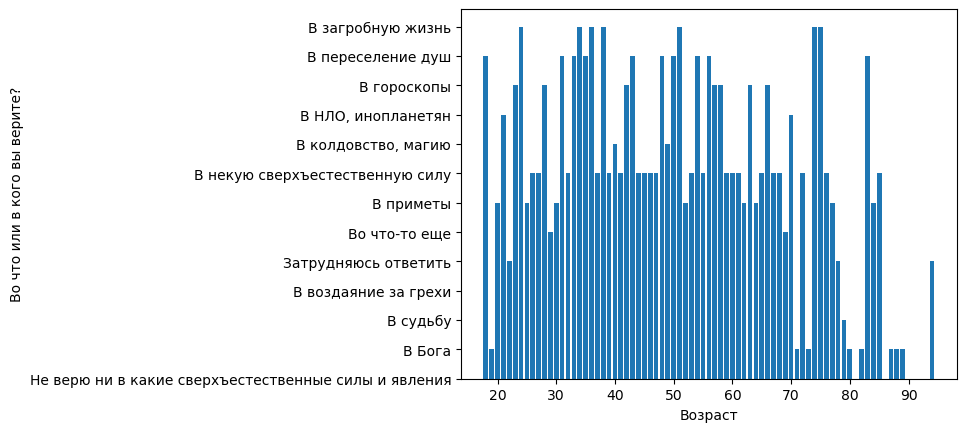

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import os

df = pd.read_spss('Astrology.sav')

fig, ax = plt.subplots()
ax.bar(df['AGE'], df['astr1_1'])
ax.xaxis.set_label('Возраст')

plt.xlabel('Возраст')
plt.ylabel("Во что или в кого вы верите?")

plt.show()
# df['astr1_1'].value_counts() # посчитать число ответов


# 2

Визуализация и подсчёт ответов в процентах

Посмотрим какие возрастные группы отвечали что верят в Бога больше всего

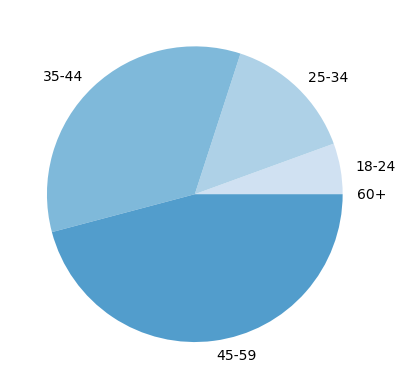

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

df = pd.read_spss('Astrology.sav')
df = df.reset_index()

ans= {
       '18-24': 0, 
       '25-34': 0,
       '35-44': 0,
       '45-59': 0,
       '60+'  : 0
}

for index, row in df.iterrows():
       age = row['AGE']
       if(row['astr1_1'] == 'В Бога'):
              if age >= 18 and age <= 24:
                     ans['18-24'] += 1
              elif age >= 25 and age <= 34:
                     ans['25-34'] += 1
              elif age >= 35 and age <= 44:
                     ans['35-44'] += 1
              elif age >= 45 and age <= 59:
                     ans['45-59'] += 1
              elif age >= 60:
                     ans['60+'] +1

# Количество ответов на поставленный вопрос
# ans = df['astr1_2'].value_counts() 

# labels = 

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(ans.values())))

fig, ax = plt.subplots()
ax.pie(ans.values(), labels = ans.keys(), colors=colors)


plt.show() 

# 3 

## ML
### Случайный лес

Попробуем предсказать на основе возраста, образования, дохода будет ли человек верующим (базируясь на массиве данных и на том, что если человек ответил что он верит в бога - верующий)

In [73]:
from sklearn import datasets

import pandas as pd

df = pd.read_spss('Astrology.sav')
df = df.reset_index()

data= {
    'age': [], 
    'gender': [],
    'income': [],
    'education': [],
    'religious': []
}

for index, row in df.iterrows():
    age = row['AGE']
    gender = row['SEX']
    income = row['DOHOD_0']
    education = row['EDU']

    data['age'].append(age)
    
    if(row['SEX'] == 'Мужской'):
        data['gender'].append(1)
    else:
        data['gender'].append(0)
    
    # Доход
    # 0 - Plohot e - Srednee 2 - Horoshee 3 - Ochen horoshee
    if(row['DOHOD_0'] == 'Плохой'):
        data['income'].append(0)    
    elif(row['DOHOD_0'] == 'Среднее'):
        data['income'].append(1)
    elif(row['DOHOD_0'] == 'Хорошее'):
        data['income'].append(2)
    else:
        data['income'].append(3)

    # Образование
    # 0 - Plohoe 1 - Srednee 2 - Horoshee 3 - Ochen horoshee
    if(row['EDU'] == 'Среднее общее (10 или 11 классов школы с аттестатом)'):
        data['education'].append(0)   
    elif(row['EDU'] == 'Среднее профессиональное (техникум, колледж, ПТУ)'):
        data['education'].append(1)
    elif(row['EDU'] == 'Незаконченное высшее (с 3-го курса вуза) или законченное высшее'):
        data['education'].append(2)
    elif(row['EDU'] == 'Два и более высших образования, ученая степень кандидата или доктора наук'):
        data['education'].append(3)
    else:
        data['education'].append(-1)

    if(row['astr1_1'] == 'В Бога'):
        data['religious'].append(1)
    else: 
        data['religious'].append(0)
    
data=pd.DataFrame(data=data)

print(data)

from sklearn.model_selection import train_test_split

X = data[['age', 'gender', 'income', 'education']]
y = data['religious']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Точность предсказания: {clf.score(X_test, y_test)}")

test_data = [[70, 1, 0, 0], [25, 0, 3, 3], [56, 1, 1, 0], [40, 1, 3, 3], [18, 1, 3, -1]]
print(f"Будет ли 70летний мужчина с плохим доходом и плохим образованием верующим: {clf.predict([test_data[0]])}")
print(f"Будет ли 25летняя девушка с очень хорошим доходом и очень хорошим образованием верующей: {clf.predict([test_data[1]])}")
print(f"Будет ли 56летний мужчина со средним доходом и плохим образованием верующим: {clf.predict([test_data[2]])}")
print(f"Будет ли 40летний мужчина с оч хорошим доходом и оч хорошим образованием верующим: {clf.predict([test_data[3]])}")
print(f"Будет ли 18летний мужчина с оч хорошим доходом и оснонвым общ образованием верующим: {clf.predict([test_data[4]])}")


       age  gender  income  education  religious
0     76.0       0       1          1          0
1     34.0       1       1          2          0
2     70.0       1       2          3          1
3     68.0       1       1          1          1
4     70.0       1       1          2          0
...    ...     ...     ...        ...        ...
1597  70.0       0       1          2          1
1598  60.0       0       1          2          0
1599  66.0       1       2          2          1
1600  57.0       1       1          2          0
1601  56.0       1       1          0          1

[1602 rows x 5 columns]
Точность предсказания: 0.553014553014553
Будет ли 70летний мужчина с плохим доходом и плохим образованием верующим: [0]
Будет ли 25летняя девушка с очень хорошим доходом и очень хорошим образованием верующей: [1]
Будет ли 56летний мужчина со средним доходом и плохим образованием верующим: [1]
Будет ли 40летний мужчина с оч хорошим доходом и оч хорошим образованием верующим: [1]
Будет 

/home/thephoneoff/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/thephoneoff/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/thephoneoff/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/thephoneoff/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/thephoneoff/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# 4

## ML
### Случайный лес

Попробуем найти какие факторы наиболее важные (**based on mean decrease in impurity**)

**Верующий ли человек определяю по ответу на первый вопрос ("Верю в Бога")**

Elapsed time to compute the importances: 0.008 seconds


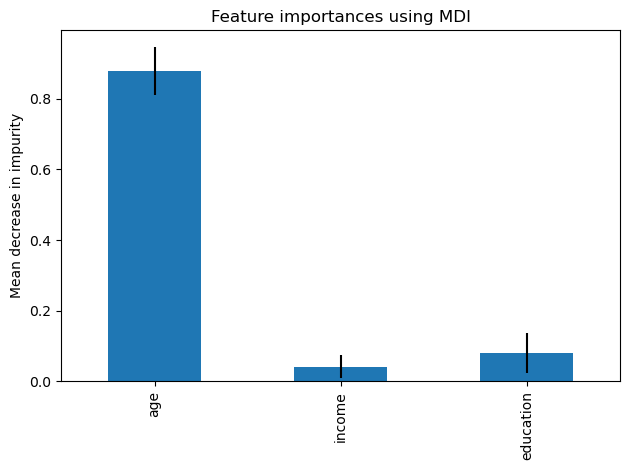

In [87]:
from sklearn import datasets

import pandas as pd

df = pd.read_spss('Astrology.sav')
df = df.reset_index()

data= {
    'age': [], 
    'gender': [],
    'income': [],
    'education': [],
    'religious': []
}

for index, row in df.iterrows():
    age = row['AGE']
    gender = row['SEX']
    income = row['DOHOD_0']
    education = row['EDU']

    data['age'].append(age)
    
    if(row['SEX'] == 'Мужской'):
        data['gender'].append(1)
    else:
        data['gender'].append(0)
    
    # Доход
    # 0 - Plohot e - Srednee 2 - Horoshee 3 - Ochen horoshee
    if(row['DOHOD_0'] == 'Плохой'):
        data['income'].append(0)    
    elif(row['DOHOD_0'] == 'Среднее'):
        data['income'].append(1)
    elif(row['DOHOD_0'] == 'Хорошее'):
        data['income'].append(2)
    else:
        data['income'].append(3)

    # Образование
    # 0 - Plohoe 1 - Srednee 2 - Horoshee 3 - Ochen horoshee
    if(row['EDU'] == 'Среднее общее (10 или 11 классов школы с аттестатом)'):
        data['education'].append(0)   
    elif(row['EDU'] == 'Среднее профессиональное (техникум, колледж, ПТУ)'):
        data['education'].append(1)
    elif(row['EDU'] == 'Незаконченное высшее (с 3-го курса вуза) или законченное высшее'):
        data['education'].append(2)
    elif(row['EDU'] == 'Два и более высших образования, ученая степень кандидата или доктора наук'):
        data['education'].append(3)
    else:
        data['education'].append(-1)

    if(row['astr1_1'] == 'В Бога'):
        data['religious'].append(1)
    else: 
        data['religious'].append(0)
    
data=pd.DataFrame(data=data)

# print(data)

from sklearn.model_selection import train_test_split

X = data[['age', 'income', 'education']]
y = data['religious']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# print(f"Точность предсказания: {clf.score(X_test, y_test)}")
import time

import numpy as np

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

feature_names = ['age', 'income', 'education']
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# 5

## ML
### Случайный лес

Попробуем найти какие факторы наиболее важные (**based on feature permutation**

**Верующий ли человек определяю по ответу на первый вопрос ("Верю в Бога")**

#### Как работает?

Произвольным образом переставить или перетасовать один столбец в наборе датасета валидации, оставив все остальные столбцы нетронутыми. Признак считается «важным», если точность модели падает и его изменение вызывает увеличение ошибок. С другой стороны, признак считается «неважным», если перетасовка его значений не влияет на точность модели.

Чем выше бар на графике тем выше точность модели при перетасовке этого признака 

#### Вывод из графика

Т.к. точность модели уменьшается при перетасовке признака ДОХОД => признак не является "важным" для определения характеристики "верующий ли человек?"
При этом два фактора оказались важными ВОЗРАСТ и ОБРАЗОВАНИЕ => наиболее "важный" из которых образование

#### ref: https://scikit-learn.ru/4-2-permutation-feature-importance/

Elapsed time to compute the importances: 0.281 seconds


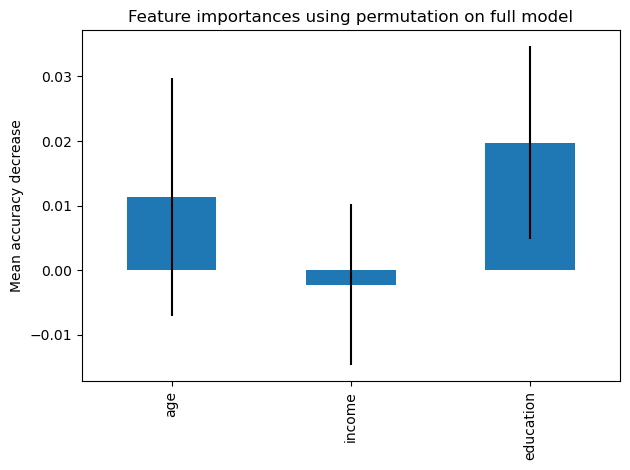

In [89]:
from sklearn import datasets

import pandas as pd

df = pd.read_spss('Astrology.sav')
df = df.reset_index()

data= {
    'age': [], 
    'gender': [],
    'income': [],
    'education': [],
    'religious': []
}

for index, row in df.iterrows():
    age = row['AGE']
    gender = row['SEX']
    income = row['DOHOD_0']
    education = row['EDU']

    data['age'].append(age)
    
    if(row['SEX'] == 'Мужской'):
        data['gender'].append(1)
    else:
        data['gender'].append(0)
    
    # Доход
    # 0 - Plohot e - Srednee 2 - Horoshee 3 - Ochen horoshee
    if(row['DOHOD_0'] == 'Плохой'):
        data['income'].append(0)    
    elif(row['DOHOD_0'] == 'Среднее'):
        data['income'].append(1)
    elif(row['DOHOD_0'] == 'Хорошее'):
        data['income'].append(2)
    else:
        data['income'].append(3)

    # Образование
    # 0 - Plohoe 1 - Srednee 2 - Horoshee 3 - Ochen horoshee
    if(row['EDU'] == 'Среднее общее (10 или 11 классов школы с аттестатом)'):
        data['education'].append(0)   
    elif(row['EDU'] == 'Среднее профессиональное (техникум, колледж, ПТУ)'):
        data['education'].append(1)
    elif(row['EDU'] == 'Незаконченное высшее (с 3-го курса вуза) или законченное высшее'):
        data['education'].append(2)
    elif(row['EDU'] == 'Два и более высших образования, ученая степень кандидата или доктора наук'):
        data['education'].append(3)
    else:
        data['education'].append(-1)

    if(row['astr1_1'] == 'В Бога'):
        data['religious'].append(1)
    else: 
        data['religious'].append(0)
    
data=pd.DataFrame(data=data)

# print(data)

from sklearn.model_selection import train_test_split

X = data[['age', 'income', 'education']]
y = data['religious']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=85)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# print(f"Точность предсказания: {clf.score(X_test, y_test)}")
import time

import numpy as np

start_time = time.time()
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

feature_names = ['age', 'income', 'education']
forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()